## 1.概述

### 1.1 概念：

**KL 散度**（Kullback-Leibler Divergence），也称为**相对熵**（Relative Entropy），是一种用于**衡量两个概率分布之间差异**的数学工具。它可以告诉我们从一个分布转变到另一个分布所需要的额外信息量。

### 1.2 公式：

给定两个李淑娜或者连续概率分布的P和Q，KL散度的定义如下：

离散情况：
$$
D_{KL}(P \parallel Q) = \sum_i P(i) \log \frac{P(i)}{Q(i)}
$$

连续情况：
$$
D_{KL}(P \parallel Q) = \int P(x) \log \frac{P(x)}{Q(x)} \, dx
$$

### 1.3 应用：

- **信息论**：在信息论中，KL 散度用于衡量一个概率分布与某个基准分布之间的差异，或者表示信息压缩的损失。
- **机器学习**：在机器学习中，KL 散度被用于训练生成模型，比如生成对抗网络（GANs）中的生成器和判别器之间的训练。
- **概率模型比较**：KL 散度可以用于比较不同的概率模型之间的性能，从而选择最适合数据的模型。
- **优化问题**：KL 散度在优化问题中也有应用，例如在变分推断中，将一个复杂的分布近似为一个简单的分布，从而简化问题。


In [3]:
!pip install scikit-learn

                                              0.0/9.3 MB ? eta -:--:--
                                              0.0/9.3 MB ? eta -:--:--
                                              0.0/9.3 MB ? eta -:--:--
                                              0.0/9.3 MB ? eta -:--:--
                                              0.0/9.3 MB ? eta -:--:--
                                              0.0/9.3 MB ? eta -:--:--
                                              0.0/9.3 MB ? eta -:--:--
                                              0.0/9.3 MB ? eta -:--:--
                                              0.0/9.3 MB 187.9 kB/s eta 0:00:50
                                              0.0/9.3 MB 187.9 kB/s eta 0:00:50
                                              0.0/9.3 MB 187.9 kB/s eta 0:00:50
                                              0.1/9.3 MB 218.8 kB/s eta 0:00:43
                                              0.1/9.3 MB 241.3 kB/s eta 0:00:39
                                


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from sklearn import manifold, datasets
from scipy.stats import entropy, pearsonr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

In [9]:
# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000 # 生成1000个数据点

# make_s_curve() 生成三维数据集（“S形曲线”）
# 设置 random_state 为0，确保每次运行代码时都生成相同的随机数据，从而方便重现结果。
# make_s_curve() 接受参数：n_samples(样本点数量)，noise（添加噪音量），random_state(随机种子/用于重现相同的数据集)
X, color = datasets.make_s_curve(n_points, random_state=0)

# make_swiss_roll()生成三维数据集（“瑞士卷”）
# col 可能是一个包含与数据点相关信息的数组（在这里可能表示颜色信息）
x, col = datasets.make_swiss_roll(n_points, noise=0.05)

# 将一个三维数据集 X 的特征分量分别存储到三个变量 X1、X2 和 X3 中
X1, X2, X3 = X.T

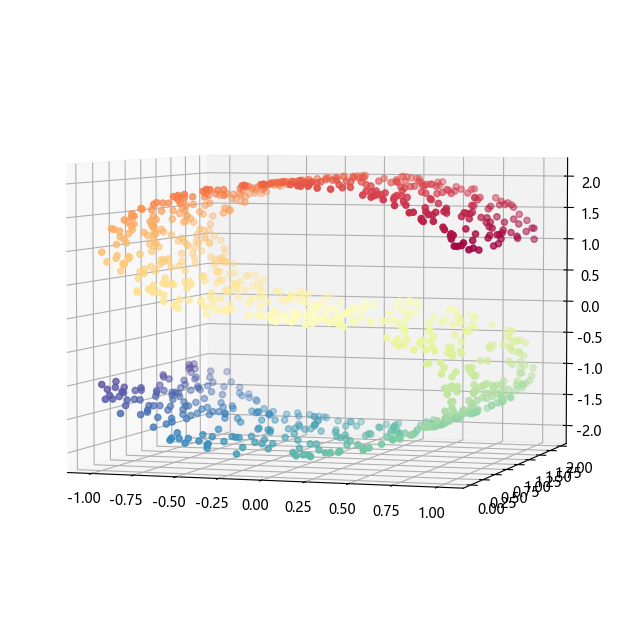

In [10]:
fig = plt.figure(figsize=(8,8))
# 在图形对象上添加一个三维坐标轴
ax = fig.add_subplot(111,projection = '3d')
# 使用 ax.scatter() 函数绘制三维散点图
# 将数据集 X 中的第一个特征分量作为 x 轴坐标，第二个特征分量作为 y 轴坐标，第三个特征分量作为 z 轴坐标
# 颜色信息 color 被映射到散点的颜色上
# 颜色映射 cmap=plt.cm.Spectral，以便根据数据分布显示不同颜色的散点
ax.scatter(X[:,0],X[:,1],X[:,2], c=color,cmap=plt.cm.Spectral)
# 调整观察角度：垂直旋转角度设置为 4 度，水平旋转角度设置为 -72 度
ax.view_init(4,-72)

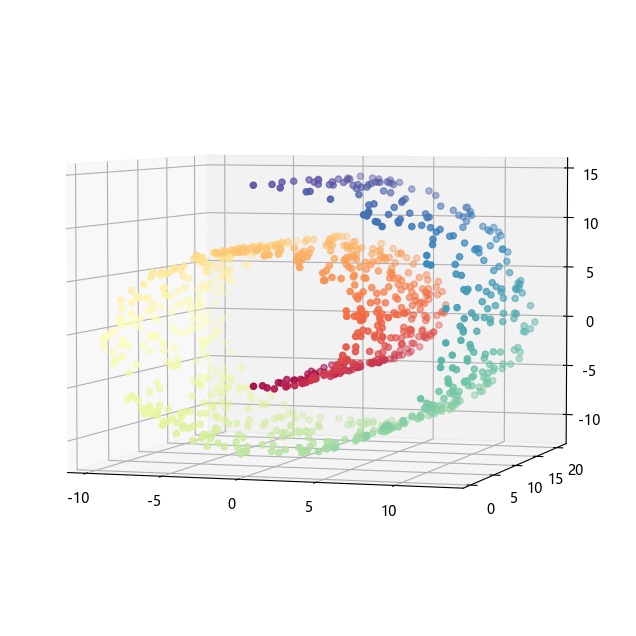

In [11]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0],x[:,1],x[:,2],c=col,cmap=plt.cm.Spectral)
ax.view_init(4,-72)

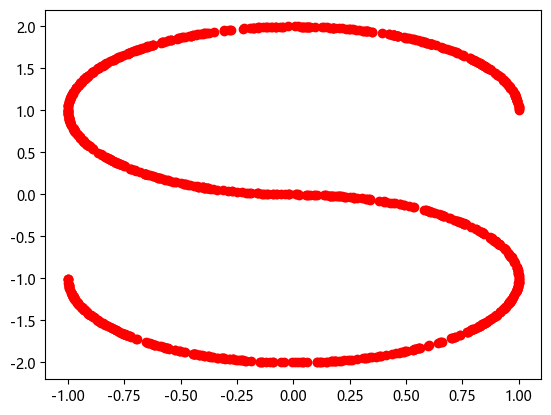

In [12]:
plt.plot(X1, X3, 'ro');

In [14]:
from sklearn.metrics.cluster import normalized_mutual_info_score

In [15]:
normalized_mutual_info_score(X1, X3), pearsonr(X1, X3)

D:\anaconda\envs\cc2\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


(1.0,
 PearsonRResult(statistic=-0.0869731825891339, pvalue=0.005921261651159763))

normalized_mutual_info_score()计算两个聚类之间的标准化互信息分数，结果在0（无互信息）和1（完全相关）之间；
皮尔逊相关系数绝对值影响相关程序，正负号代表正负相关，p值是观察到的数据与零假设（两个数据集之间没有关联）的差异程度

In [16]:
def processNegVals(x):
    """将输入的数组处理成非负且归一化的概率分布"""
    x = np.array(x)
    minx = np.min(x)
    if minx < 0:
        x = x + abs(minx)
    """ 0.000001 is used here to avoid 0. """
    x = x + 0.000001
    px = x/np.sum(x)
    return px

In [17]:
entropy(processNegVals(X1), processNegVals(X3))
# 调用了 entropy 函数来计算两个经过处理的数组之间的相对熵（KL散度）
# 相对熵是一个非负值，它衡量了两个概率分布之间的差异
# 值越大，表示两个分布之间的差异越大

0.9820849486320271

In [18]:
def KL(P,Q):
    """计算两个概率分布之间的KL散度"""
    epsilon = 0.00001
    P = processNegVals(P)
    Q = processNegVals(Q)
    # You may want to instead make copies to avoid changing the np arrays.
    divergence = np.sum(P*np.log(P/Q))
    return divergence

In [19]:
KL(X1, X3)

0.9820849486320271

In [20]:
# Kullback-Leibler divergence is basically the sum of the relative entropy of two probabilities:
# scipy库中special模块的rel_entr()函数
import scipy
vec = scipy.special.rel_entr(processNegVals(X1), processNegVals(X3))    
kl_div = np.sum(vec)
kl_div

0.9820849486320271

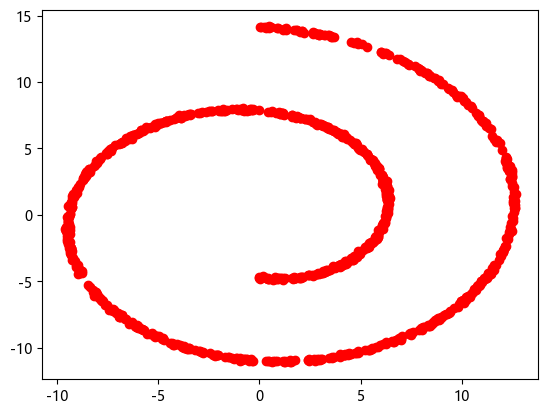

In [21]:
plt.plot(x[:,0], x[:,2], 'ro');

In [22]:
KL(x[:,0], x[:,2])

0.6084460776369978

In [24]:
entropy(processNegVals(x[:,0]), processNegVals(x[:,2]))

0.6084460776369978

In [25]:
# Kullback-Leibler divergence is basically the sum of the relative entropy of two probabilities:

import scipy
vec = scipy.special.rel_entr(processNegVals(x[:,0]), processNegVals(x[:,2]))    
kl_div = np.sum(vec)
kl_div

0.6084460776369978

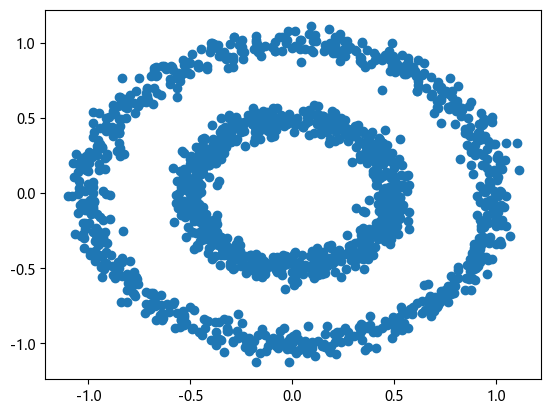

In [26]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, 
                                      factor=.5,
                                      noise=.05)

c1, c2 = noisy_circles[0][:,0], noisy_circles[0][:,1]

plt.scatter(c1, c2);

In [27]:
KL(c1, c2), entropy(processNegVals(c1), processNegVals(c2)), pearsonr(c1, c2)

(0.3459606566530865,
 0.3459606566530865,
 PearsonRResult(statistic=0.003550387570662309, pvalue=0.890721175384392))

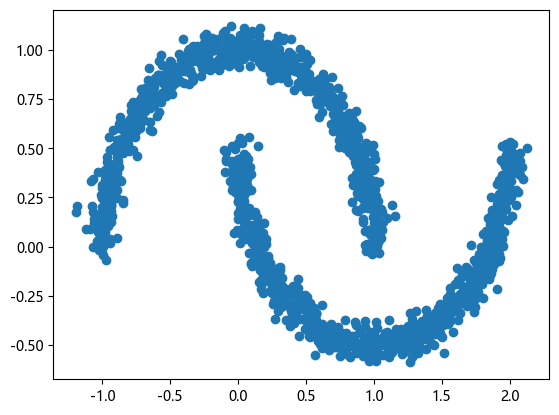

In [28]:
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
m1, m2 = noisy_moons[0][:,0], noisy_moons[0][:,1]
plt.scatter(m1, m2);

In [29]:
KL(m1, m2), entropy(processNegVals(m1), processNegVals(m2)), pearsonr(m1, m2)

(0.6444418926851703,
 0.6444418926851703,
 PearsonRResult(statistic=-0.4477955637962174, pvalue=7.31859293426286e-75))

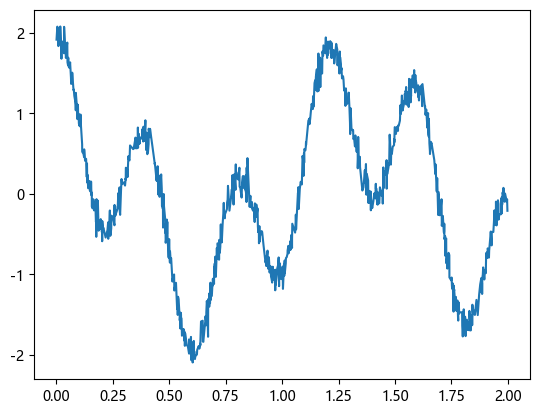

In [30]:
# Creating our own non-linear dataset
# A good way to create a non-linear dataset is to mix sines with different phases.
n_samples = 1000
de_linearize = lambda X: np.cos(1.5 * np.pi * X) + np.cos( 5 * np.pi * X )
X = np.sort(np.random.rand(n_samples)) * 2
y = de_linearize(X) + np.random.randn(n_samples) * 0.1

plt.plot(X, y);

In [31]:
KL(X, y), entropy(processNegVals(X), processNegVals(y)), pearsonr(X, y)

(0.4134084831140331,
 0.41340848311403333,
 PearsonRResult(statistic=-0.0740295589545068, pvalue=0.019216437517313733))

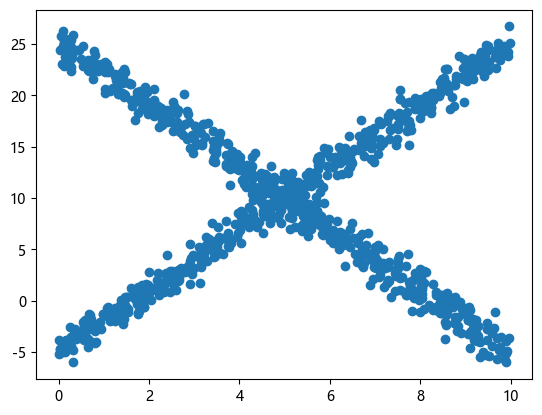

In [32]:
# generate training set

# 随机数生成器，参数1为种子，确保得到相同随机数
rng = np.random.RandomState(1) 
# 生成大小为1000的一维数组x，rand 函数返回一个在 [0, 1) 区间内均匀分布的随机数数组
# 然后，这个数组被乘以 10，因此 x 中的元素在 [0, 10) 区间内
x = 10 * rng.rand(1000) 
# 使用 numpy.random.choice 函数从 x 数组中随机选择了 500 个不重复的元素，并将其存储在新数组 x1 中
x1 = np.random.choice(x, size = 500, replace = False)
# 得到互不相交的输入数组x1和x2
x2 = np.array([i for i in x if i not in x1])

# 线性函数和随机噪声
y1 = 3 * x1 - 5 + rng.randn(500) 
y2 = -3 * x2 + 25 + rng.randn(500)

# 将两个输入数组水平堆叠在一起，形成新的输入数组
x = np.hstack((x1, x2))
y = np.hstack((y1, y2))
plt.scatter(x, y);

In [33]:
KL(x, y), entropy(processNegVals(x), processNegVals(y)), pearsonr(x, y)

(0.44836084971278106,
 0.44836084971278106,
 PearsonRResult(statistic=0.02016614918653057, pvalue=0.5241399501252098))

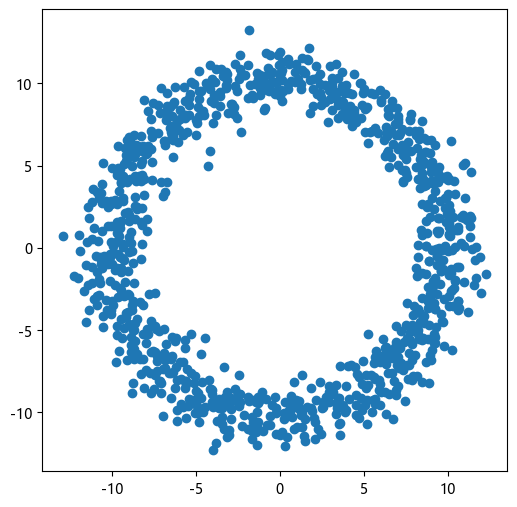

In [34]:
num_samples = 1000

# make a simple unit circle 
theta = np.linspace(0, 2*np.pi, num_samples)
a, b = 1 * np.cos(theta), 1 * np.sin(theta)

# generate the points
# theta = np.random.rand((num_samples)) * (2 * np.pi)
r = 10
x, y = r * np.cos(theta)+ rng.randn(num_samples), r * np.sin(theta)+ rng.randn(num_samples)

# plots
plt.figure(figsize=(6,6))
plt.plot(x, y, marker='o', linestyle='');

In [35]:
KL(x, y), entropy(processNegVals(x), processNegVals(y)), pearsonr(x, y)

(0.4421967010154317,
 0.4421967010154319,
 PearsonRResult(statistic=-0.0005491699430294996, pvalue=0.9861617376885676))

## 最大信息系数（MIC）

MIC（最大信息系数）是一种用于发现变量之间统计相关性的方法，属于最大信息基础非参数探索（MINE）的一部分。

它用于衡量两个变量之间的**关联程度**，线性或非线性的强度，常用于机器学习的特征选择。

MIC的值域在0和1之间，值越高表示相关性越强。

In [37]:
!python -m pip install --upgrade pip

                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB 115.5 kB/s eta 0:00:18
                                              0.0/2.1 MB 115.5 kB/s eta 0:00:18
                                              0.0/2.1 MB 115.5 kB/s eta 0:00:18
     -                                        0.1/2.1 MB 151.3 kB/s eta 0:00:14
     -                                        0.1/2.1 MB 151.3 kB/s eta 0:00:14
     --                         

In [1]:
!pip install minepy

C:\Users\零落\AppData\Local\Temp\ipykernel_32800\2525378346.py:65: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  np.array([-1, 1])[rs.random_integers(0, 1, size=n)]


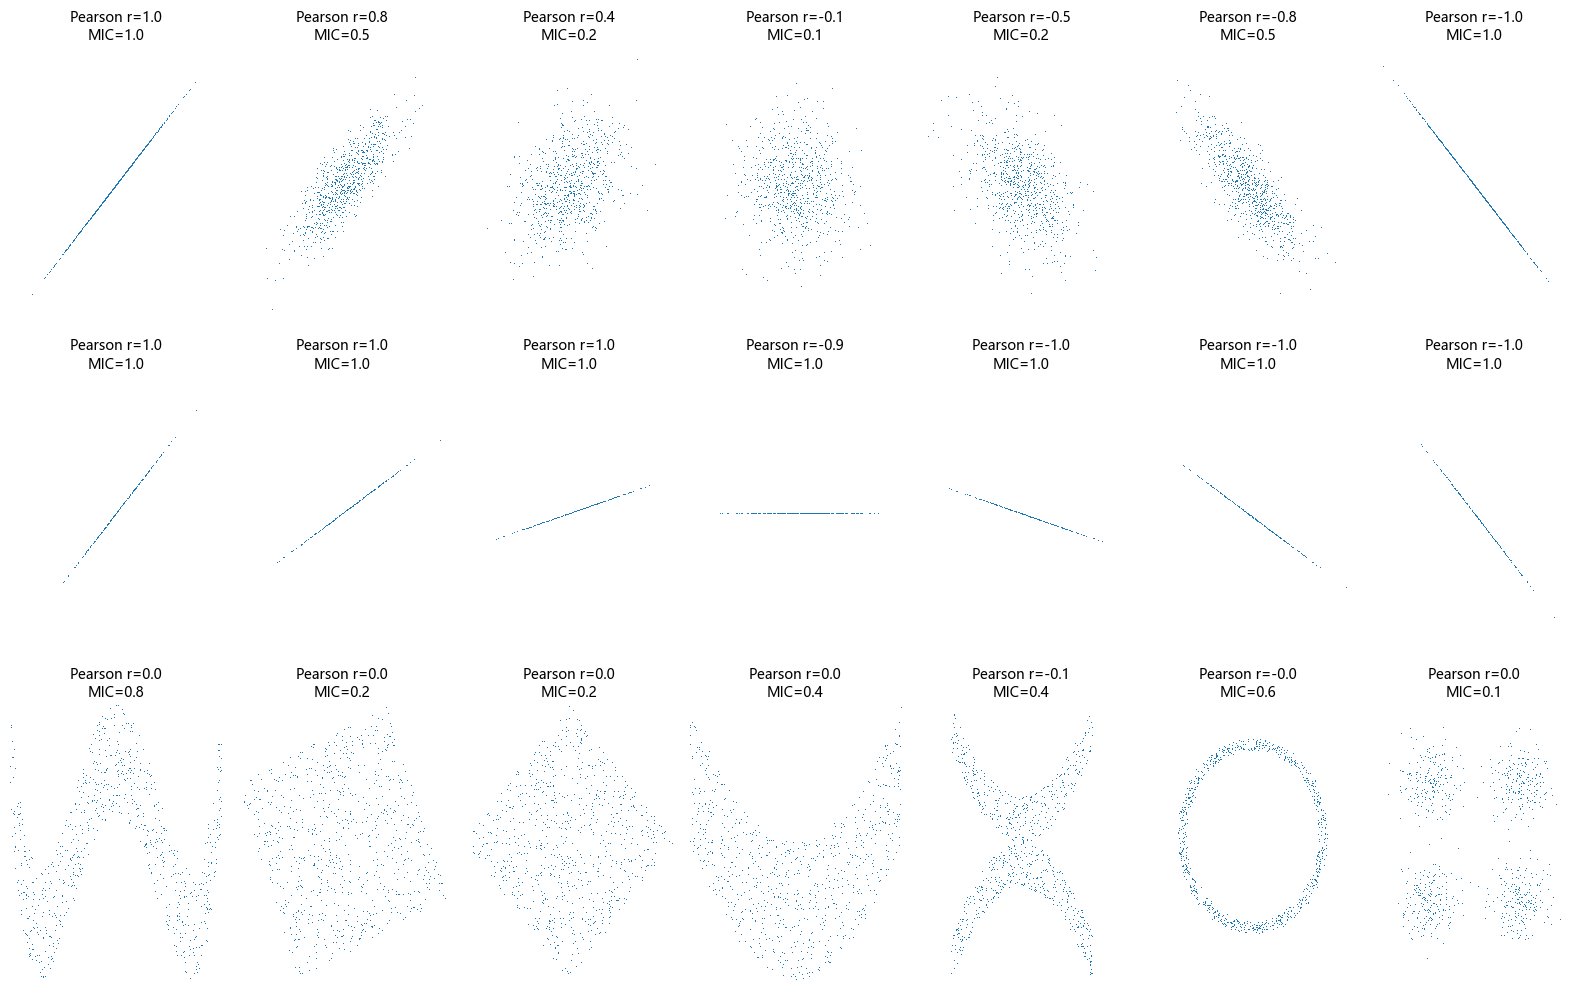

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from minepy import MINE


rs = np.random.RandomState(seed=0)

def mysubplot(x, y, numRows, numCols, plotNum,
              xlim=(-4, 4), ylim=(-4, 4)):

    r = np.around(np.corrcoef(x, y)[0, 1], 1)
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(x, y)
    mic = np.around(mine.mic(), 1)
    ax = plt.subplot(numRows, numCols, plotNum,
                     xlim=xlim, ylim=ylim)
    ax.set_title('Pearson r=%.1f\nMIC=%.1f' % (r, mic),fontsize=10)
    ax.set_frame_on(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.plot(x, y, ',')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

def rotation(xy, t):
    return np.dot(xy, [[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])

def mvnormal(n=1000):
    cors = [1.0, 0.8, 0.4, 0.0, -0.4, -0.8, -1.0]
    for i, cor in enumerate(cors):
        cov = [[1, cor],[cor, 1]]
        xy = rs.multivariate_normal([0, 0], cov, n)
        mysubplot(xy[:, 0], xy[:, 1], 3, 7, i+1)

def rotnormal(n=1000):
    ts = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/2-np.pi/6,
          np.pi/2-np.pi/12, np.pi/2]
    cov = [[1, 1],[1, 1]]
    xy = rs.multivariate_normal([0, 0], cov, n)
    for i, t in enumerate(ts):
        xy_r = rotation(xy, t)
        mysubplot(xy_r[:, 0], xy_r[:, 1], 3, 7, i+8)

def others(n=1000):
    x = rs.uniform(-1, 1, n)
    y = 4*(x**2-0.5)**2 + rs.uniform(-1, 1, n)/3
    mysubplot(x, y, 3, 7, 15, (-1, 1), (-1/3, 1+1/3))

    y = rs.uniform(-1, 1, n)
    xy = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)
    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2+np.sqrt(2)) / np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 16, (-lim, lim), (-lim, lim))

    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 17, (-lim, lim), (-lim, lim))

    y = 2*x**2 + rs.uniform(-1, 1, n)
    mysubplot(x, y, 3, 7, 18, (-1, 1), (-1, 3))

    y = (x**2 + rs.uniform(0, 0.5, n)) * \
        np.array([-1, 1])[rs.random_integers(0, 1, size=n)]
    mysubplot(x, y, 3, 7, 19, (-1.5, 1.5), (-1.5, 1.5))

    y = np.cos(x * np.pi) + rs.uniform(0, 1/8, n)
    x = np.sin(x * np.pi) + rs.uniform(0, 1/8, n)
    mysubplot(x, y, 3, 7, 20, (-1.5, 1.5), (-1.5, 1.5))

    xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], int(n/4))
    xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], int(n/4))
    xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], int(n/4))
    xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], int(n/4))
    xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 21, (-7, 7), (-7, 7))

plt.figure(facecolor='white', figsize = (16, 10))
mvnormal(n=800)
rotnormal(n=200)
others(n=800)
plt.tight_layout()
plt.show()

TypeError: __init__() takes 1 positional argument but 3 positional arguments (and 2 keyword-only arguments) were given

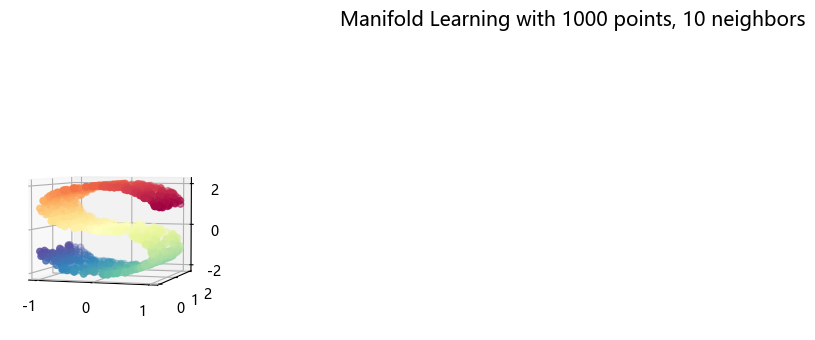

In [3]:
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>
from collections import OrderedDict # 有序字典
from functools import partial # 创建部分函数
from time import time # 计时

import matplotlib.pyplot as plt # 绘图
from mpl_toolkits.mplot3d import Axes3D # 绘制3d图
from matplotlib.ticker import NullFormatter # 格式化坐标轴刻度

from sklearn import manifold, datasets # 机器学习算法和工具

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['LTSA'] = LLE(method='ltsa')
methods['Hessian LLE'] = LLE(method='hessian')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                           n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()